In [1]:
#imports packagaes 
import numpy as np
import scipy as sp
import os
import pandas as pd
import librosa
import glob 
import matplotlib.pyplot as plt
import librosa.display


In [6]:
window = 1
dataset = []
labels = []
#each set of data that was recorded has 22050 datapoints for every second of data. I truncate it to 2 seconds long for each sample of data. 

coughnum = 0 
for num in np.arange(1,4):
    filename = '/Users/akhil/Documents/GuardioFinalCode/data/cough' + str(num) + '.wav'
    data, sampling_rate = librosa.load(filename)
    sec = 22050*window
    begin = 0
    end = begin+sec
    while end < len(data):
        crop = data[begin:end]
        begin = end
        end = begin + sec
        dataset.append(crop)
        labels.append(1)
        coughnum+=1
ambientnum = 0      
for num in np.arange(1,3):
    filename = '/Users/akhil/Documents/GuardioFinalCode/data/ambient' + str(num) + '.wav'
    data, sampling_rate = librosa.load(filename)
    sec = 22050*window 
    begin = 0
    end = begin+sec
    while end < len(data):
        crop = data[begin:end]
        begin = end
        end = begin + sec
        dataset.append(crop)
        labels.append(2)
        ambientnum+=1

In [7]:
print(np.shape(dataset))
print(np.shape(labels))
print('Number of Cough Data: ' + str(coughnum))
print('Number of Ambient Data: ' + str(ambientnum))


(104, 22050)
(104,)
Number of Cough Data: 51
Number of Ambient Data: 53


In [8]:
#this block uses the naive bayes algorithm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

[X_train, X_test, y_train, y_test] = train_test_split(dataset, labels, random_state=0)

nb = GaussianNB().fit(X_train, y_train)
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))
print("Predicted labels = " + str(nb.predict(X_test)))
print("Correct labels =   " + str(y_test))

0.9615384615384616
0.9230769230769231
Predicted labels = [1 2 1 2 2 1 1 2 2 1 2 2 2 1 1 2 1 1 1 1 1 2 1 1 2 2]
Correct labels =   [1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2]


In [9]:
#this block uses the random forest algorithm
rf = RandomForestClassifier().fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))
print("Predicted labels = " + str(rf.predict(X_test)))
print("Correct labels =   " + str(y_test))

1.0
0.8846153846153846
Predicted labels = [2 2 1 2 2 1 1 2 2 1 2 2 2 2 1 2 1 1 1 1 1 2 1 2 2 2]
Correct labels =   [1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2]


1


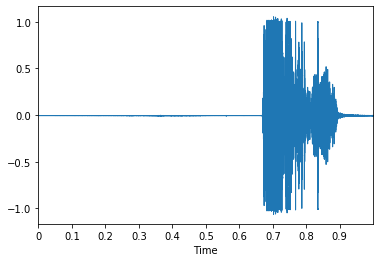

2


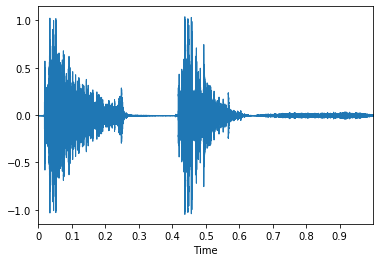

3


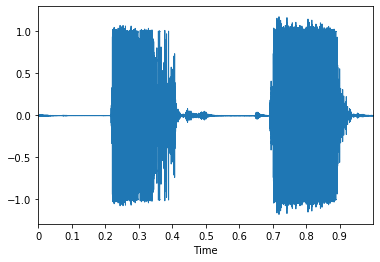

4


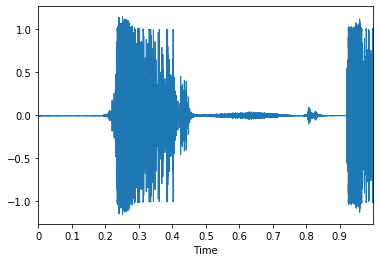

5


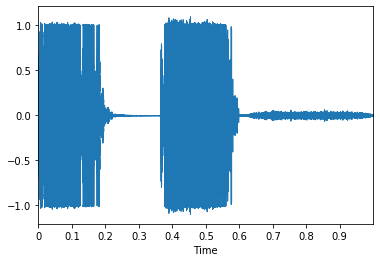

6


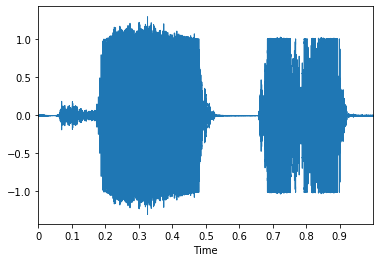

7


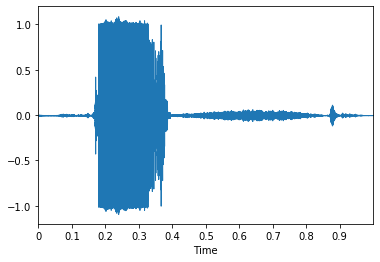

8


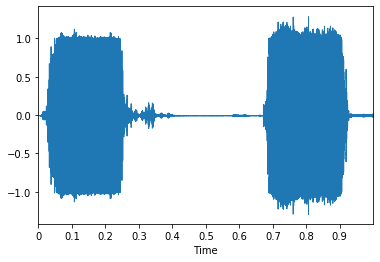

9


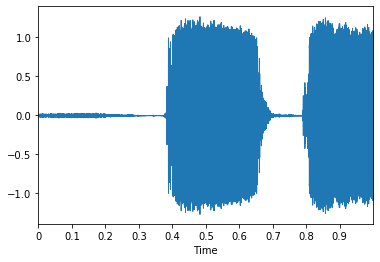

10


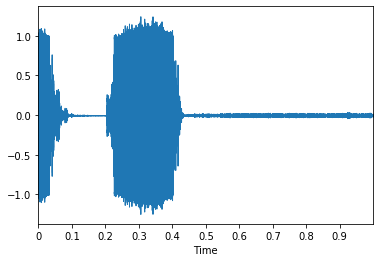

11


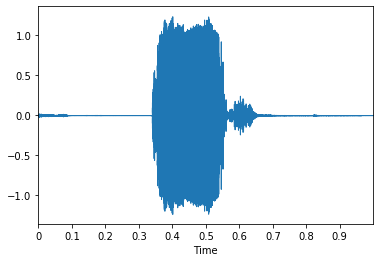

12


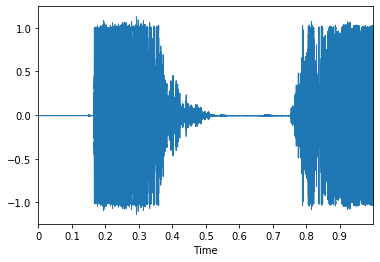

13


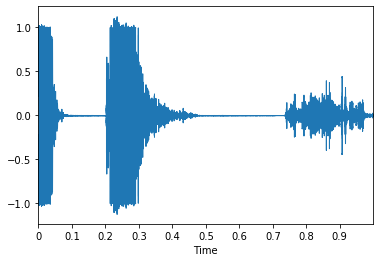

14


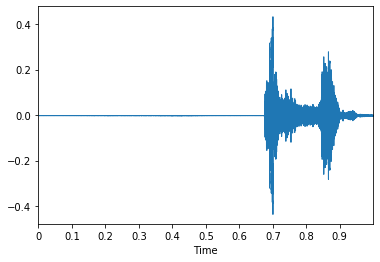

15


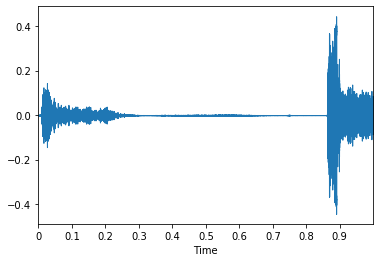

16


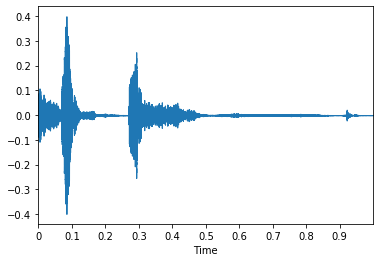

17


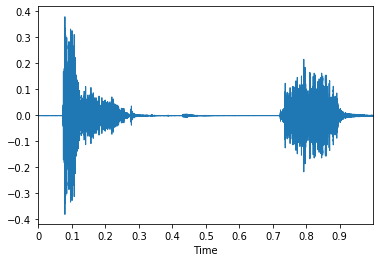

18


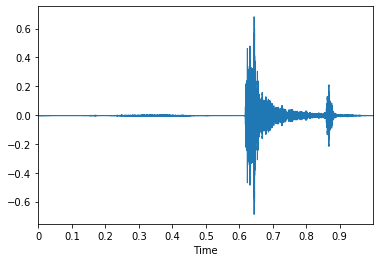

19


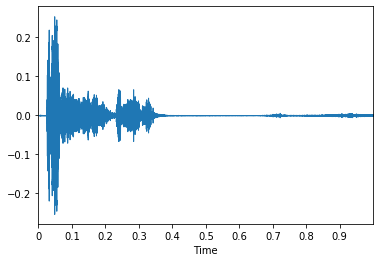

20


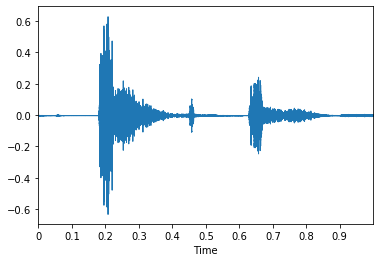

21


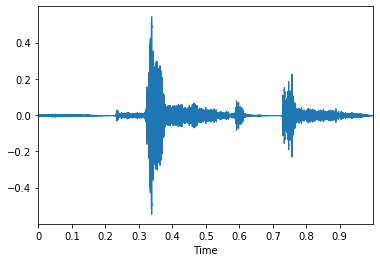

22


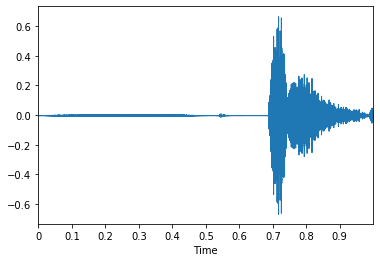

23


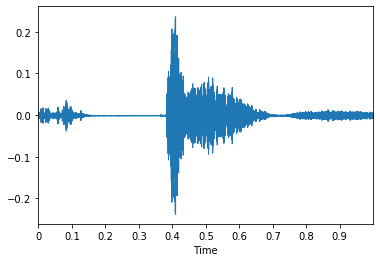

24


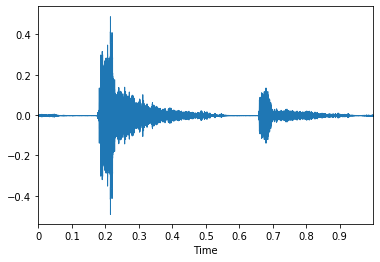

25


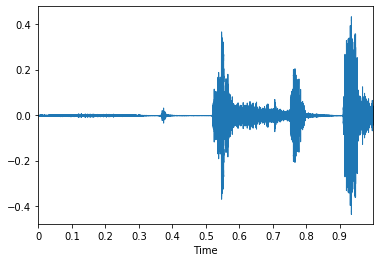

26


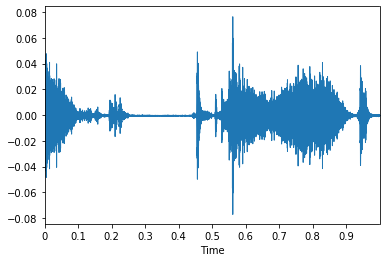

27


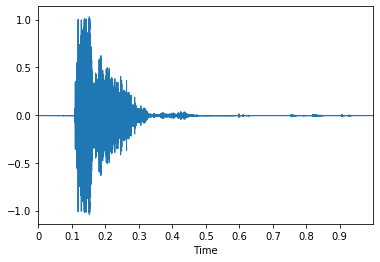

28


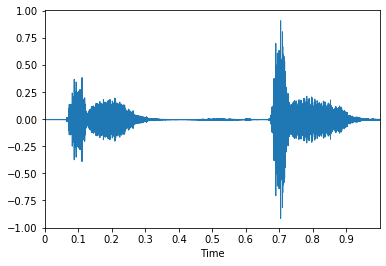

29


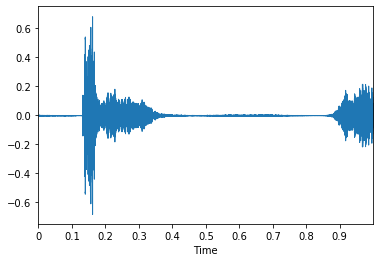

30


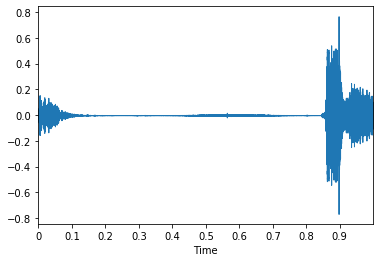

31


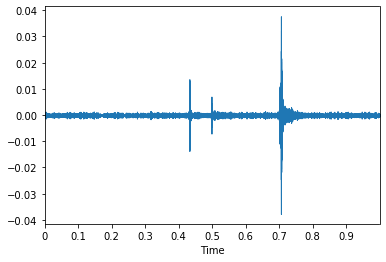

32


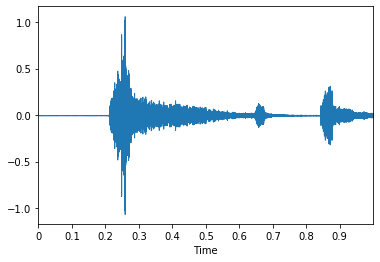

33


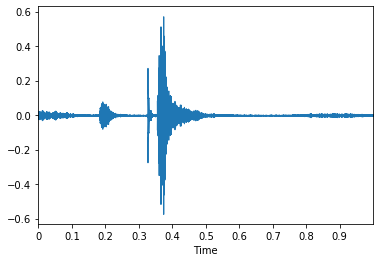

34


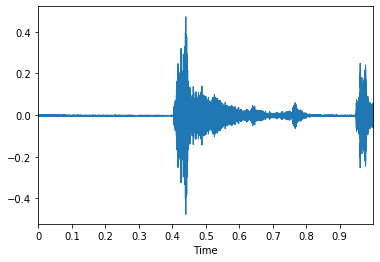

35


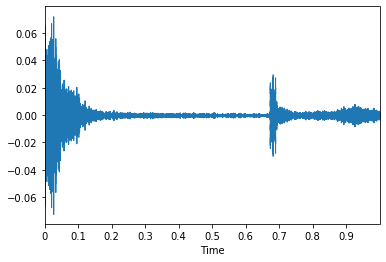

36


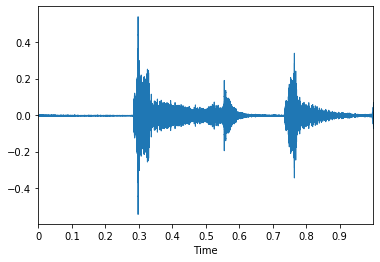

37


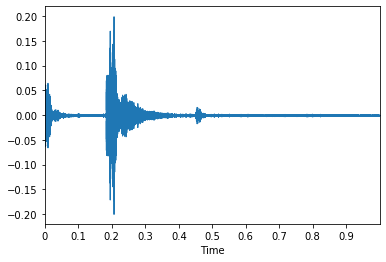

38


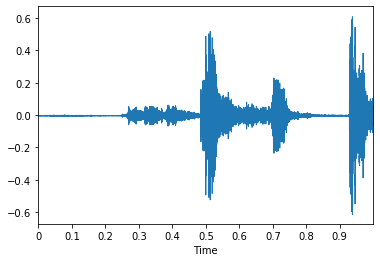

39


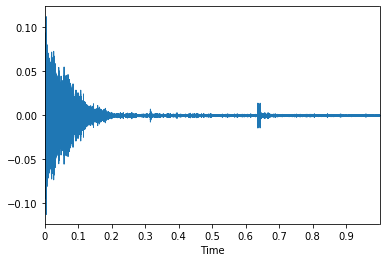

40


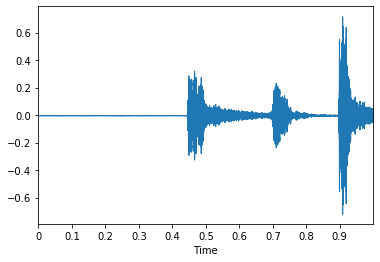

41


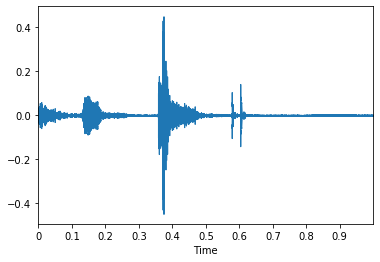

42


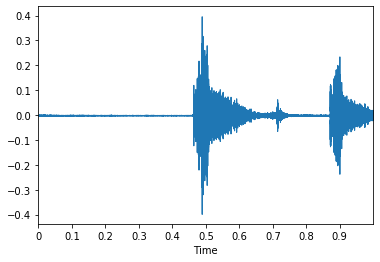

43


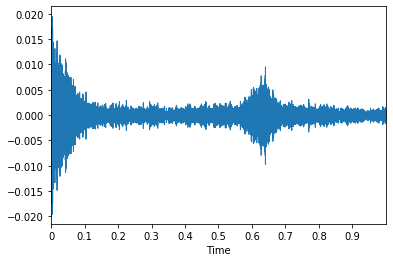

44


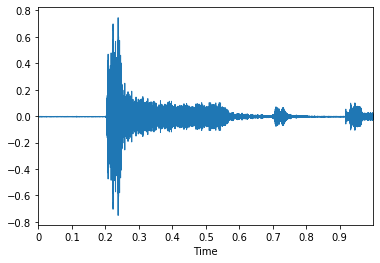

45


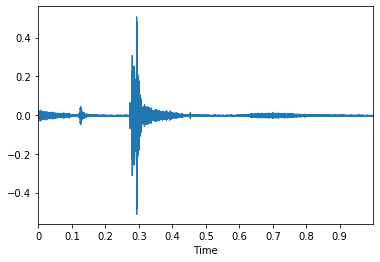

46


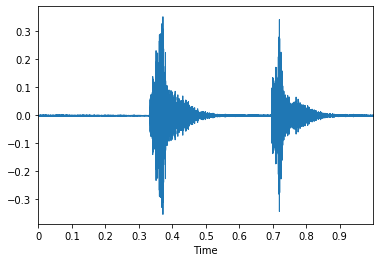

47


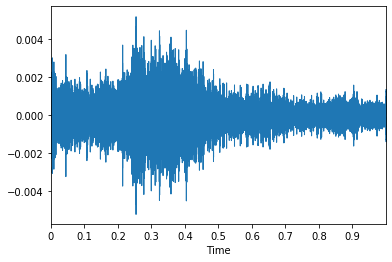

48


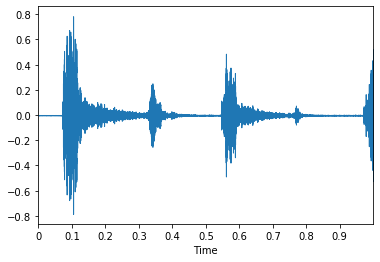

49


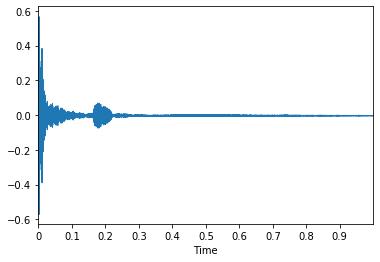

50


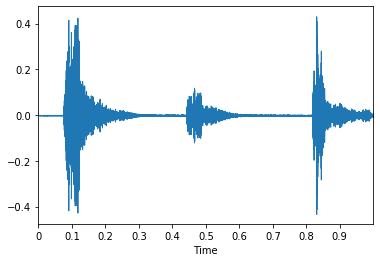

51


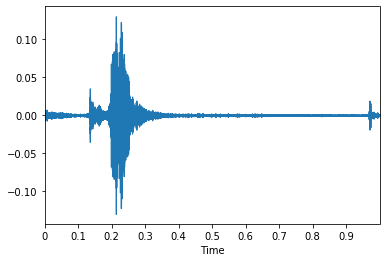

52


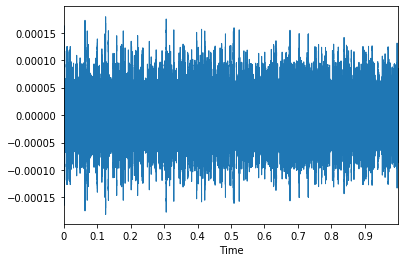

53


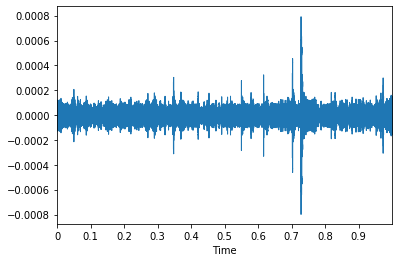

54


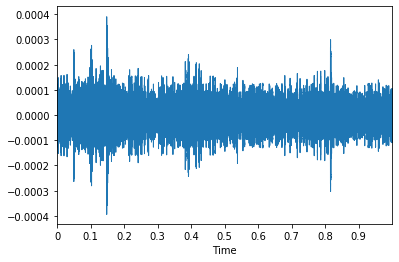

55


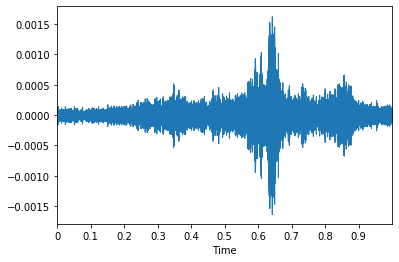

56


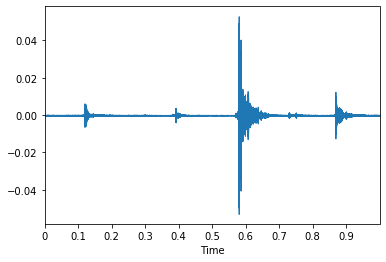

57


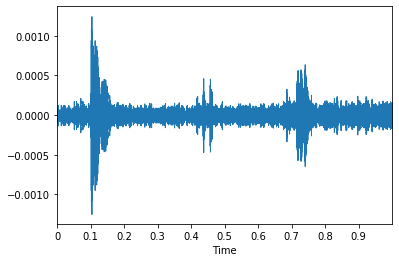

58


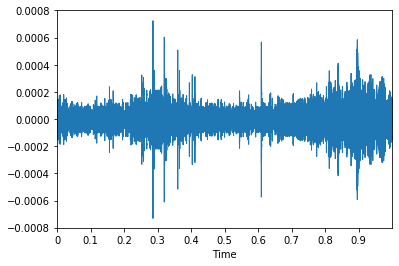

59


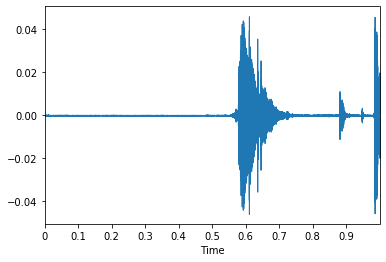

60


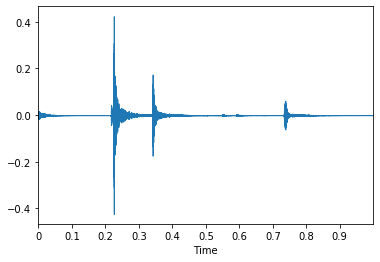

61


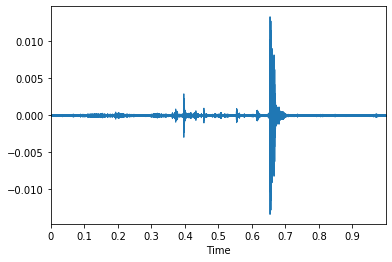

62


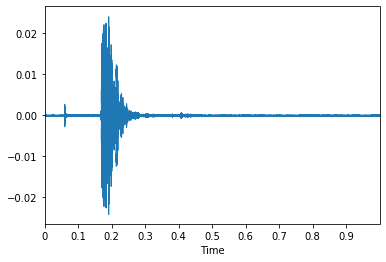

63


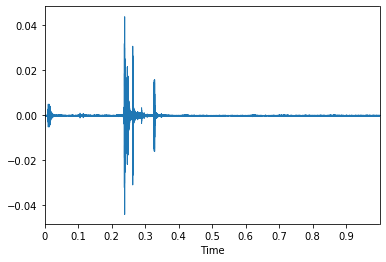

64


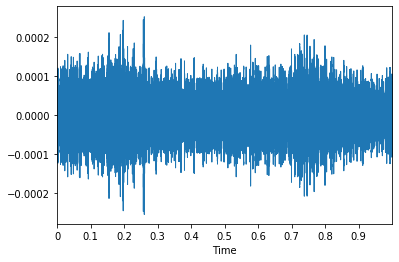

65


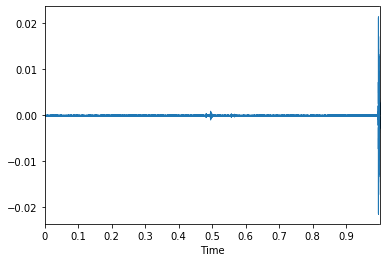

66


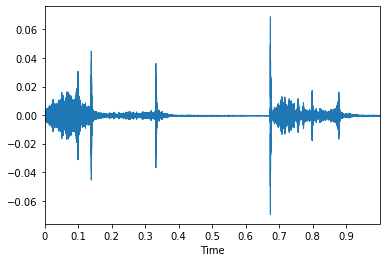

67


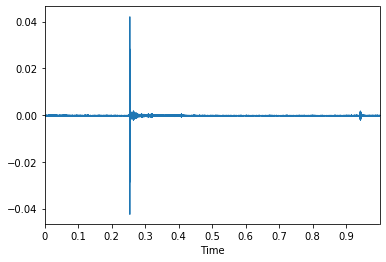

68


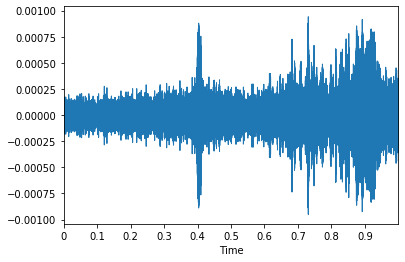

69


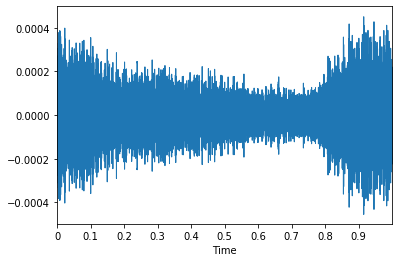

70


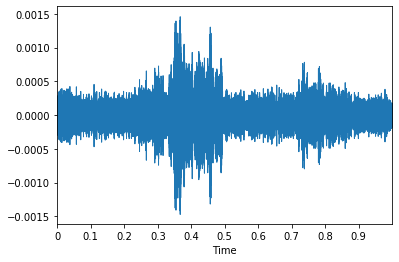

71


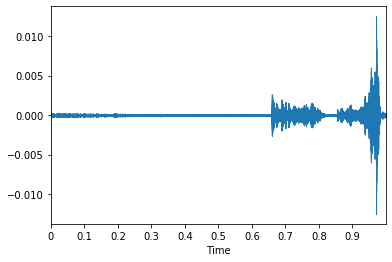

72


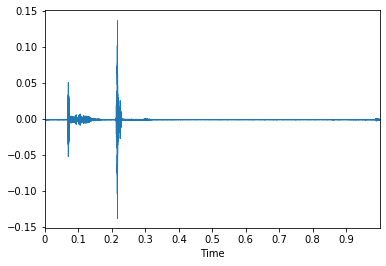

73


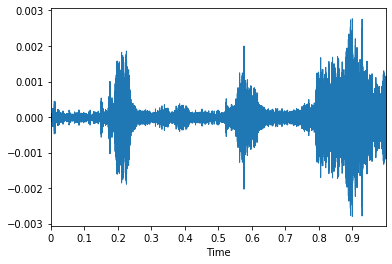

74


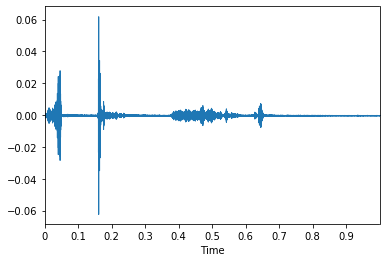

75


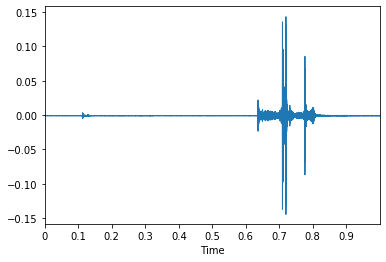

76


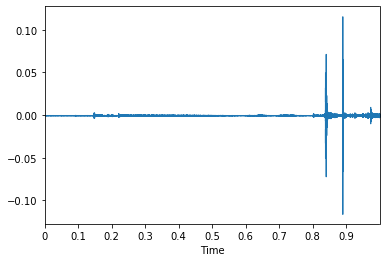

77


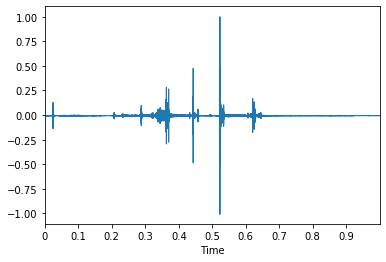

78


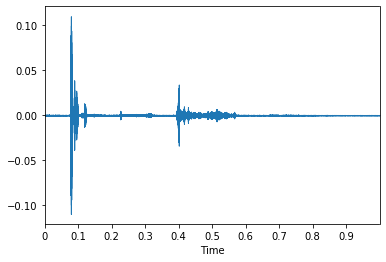

79


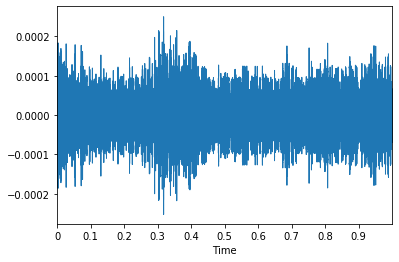

80


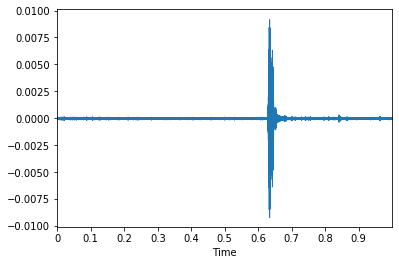

81


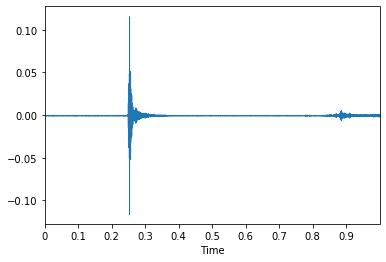

82


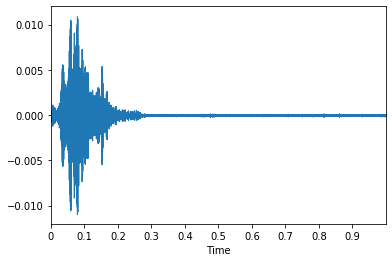

83


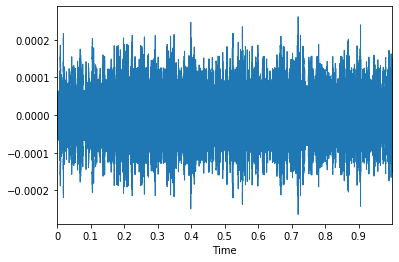

84


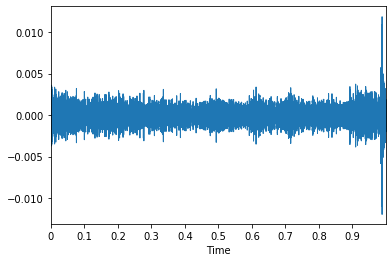

85


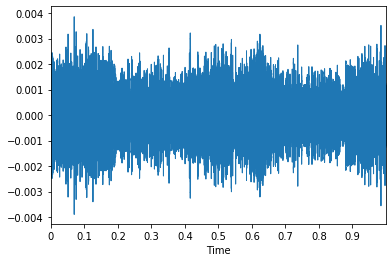

86


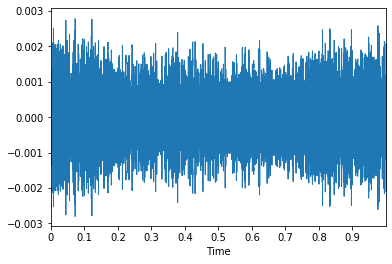

87


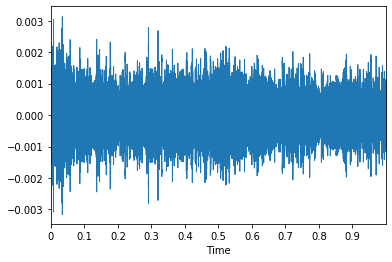

88


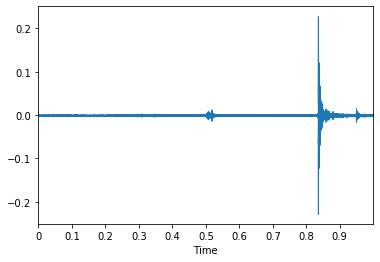

89


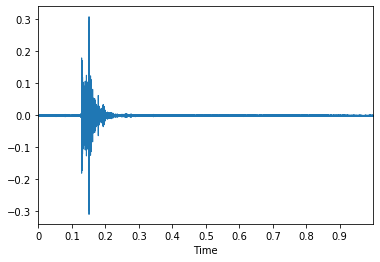

90


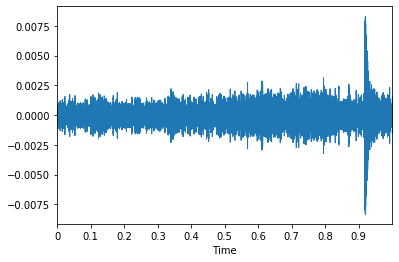

91


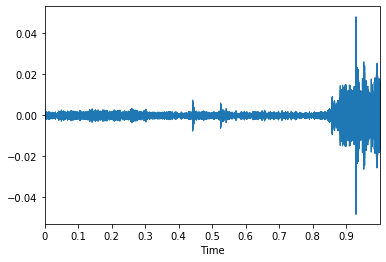

92


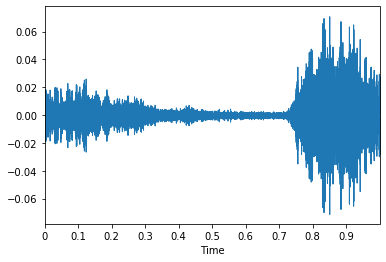

93


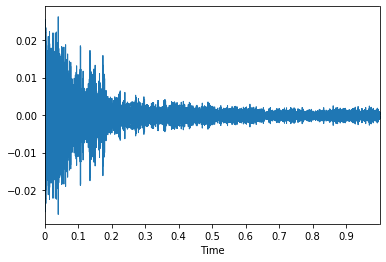

94


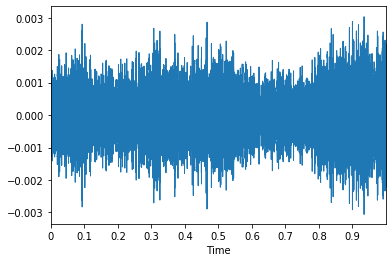

95


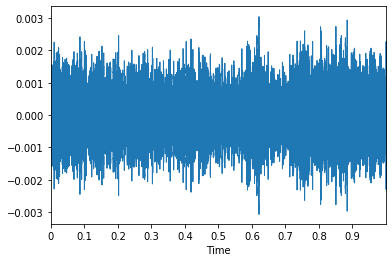

96


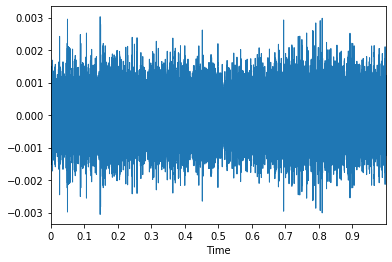

97


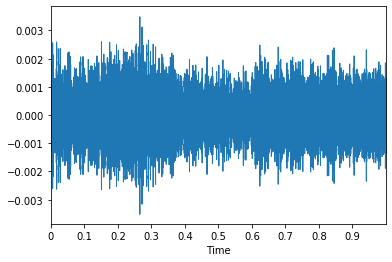

98


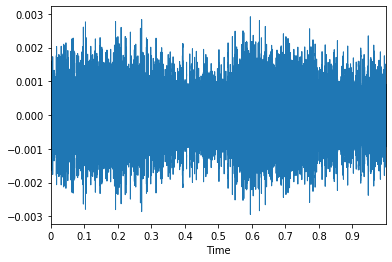

99


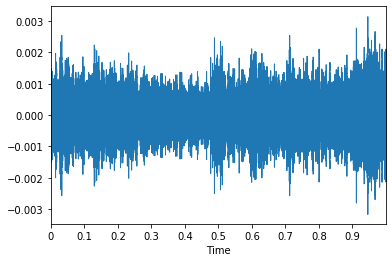

100


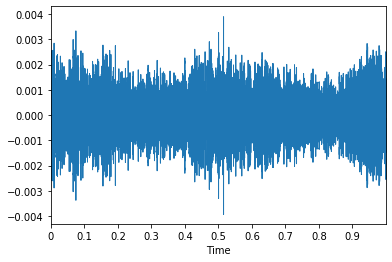

101


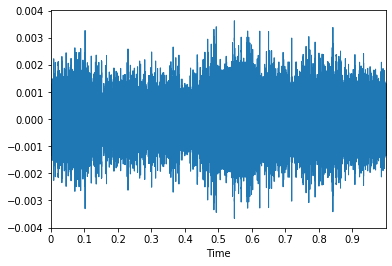

102


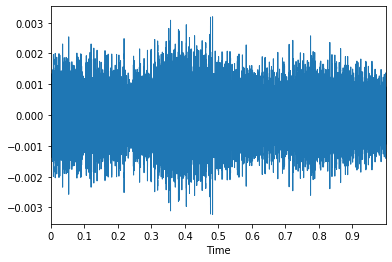

103


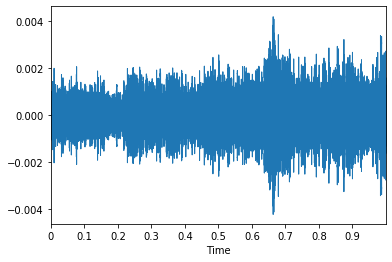

104


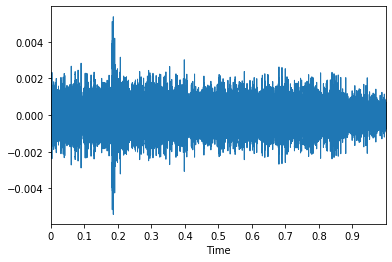

In [10]:
#this block shows all the samples of data used to train the model
num = 1
for matrix in dataset:
    print(num)
    librosa.display.waveplot(matrix, sr=sampling_rate)
    plt.show()
    num+=1

387552
total frames = 351
1102


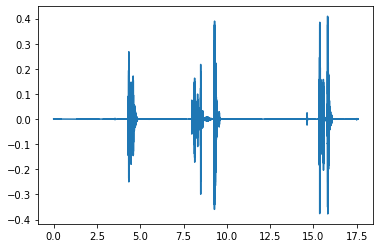

In [11]:
ydata, sampling_rate = librosa.load('test_data1.wav')
print(len(ydata))
time = np.linspace(0, len(ydata)/sampling_rate, len(ydata))
total_time = len(ydata)/sampling_rate
resolution = 20
f = int(total_time*resolution)
plt.plot(time, ydata)
print('total frames = ' + str(f))
jump = int(sampling_rate/resolution)
print(jump)


17.576054421768706
number of frames = 311


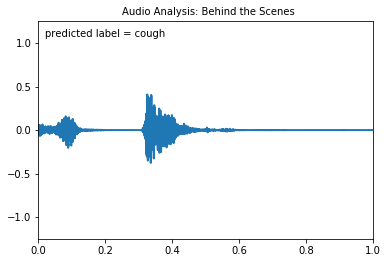

In [12]:
ydata, sampling_rate = librosa.load('test_data1.wav')
sampling_rate = sampling_rate*window
#animation stuff
time = np.linspace(0, len(ydata)/sampling_rate, len(ydata))
print(total_time)
total_time = len(ydata)/sampling_rate - 2
resolution = 20
f = int(total_time*resolution) 
jump = int(sampling_rate/resolution)

print('number of frames = ' + str((f)))

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((0, 1))
ax.set_ylim((-1.25, 1.25))
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
label_text = ax.text(0.02, 0.93, '', transform=ax.transAxes)
title_text = ax.text(0.25, 1.03,'Audio Analysis: Behind the Scenes',  transform=ax.transAxes)

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    time_text.set_text('')
    label_text.set_text('')
    return line, time_text, label_text


# animation function. This is called sequentially
def animate(i):
    n = i*jump
    #x1 = np.linspace(-2, 0, sampling_rate)
    x2 = np.linspace(0, 1, sampling_rate)
    #y1 = ydata[n-sampling_rate:n]
    y2 = ydata[n:n+sampling_rate]
    t = round(time[n], 1)
    #x = x1+x2
    #y = y1+y2
    line.set_data(x2, y2)
    
    prediction = nb.predict([y2])
    if prediction[0] == 1:
        prediction = 'cough'
    elif prediction[0] == 2:
        prediction = 'ambient'
    elif prediction[0] == 3:
        prediction = 'choking'
    #time_text.set_text('time = ' + str(t))
    label_text.set_text('predicted label = ' + prediction )
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames = f, interval=1000/resolution, blit=True)

HTML(anim.to_html5_video())
